In [89]:
# Install libraries if needed (run in terminal or uncomment here)
# !pip install pandas numpy matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('seaborn-v0_8')  # Use this if available in your Matplotlib version

sns.set(style='whitegrid')  # Applies a clean, modern look
sns.set_palette("husl")      # Creative color palette

# Verify setup
print("Matplotlib styles available:", plt.style.available[:5])  # Show first 5 styles as a sample

Matplotlib styles available: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh']


# Title and introduction in Markdown
"""
# Football Analytics: Unraveling Player Performance and Value Trends ⚽
This notebook merges two datasets of football players, cleans the data, and uncovers key trends using correlation and visualization.
Objective: Explore how stats like goals, assists, and international caps relate to market value and FIFA ratings.
"""

In [83]:
# Check columns in both dataframes
print("Columns in df1:", df1.columns)
print("Columns in df2:", df2.columns)

# Ensure column names are consistent across both dataframes for merge
df1.columns = df1.columns.str.strip()  # Remove any leading/trailing spaces
df2.columns = df2.columns.str.strip()  # Remove any leading/trailing spaces

# Check columns again after stripping
print("After stripping spaces, columns in df1:", df1.columns)
print("After stripping spaces, columns in df2:", df2.columns)

# Merge datasets using outer join with suffixes (_df1 and _df2)
merged_df = pd.merge(df1, df2, on=['full_name', 'date_of_birth', 'nationality'], how='outer', suffixes=('_df1', '_df2'))

# Check columns after merging
print("Columns in merged_df:", merged_df.columns)

# Handle columns with suffixes (_df1, _df2) by combining them
for col in ['position', 'club', 'league', 'goals', 'assists', 'yellow_cards', 'red_cards', 'minutes_played', 'games_played']:
    if f'{col}_df1' in merged_df.columns and f'{col}_df2' in merged_df.columns:
        merged_df[col] = merged_df[f'{col}_df1'].combine_first(merged_df[f'{col}_df2'])

# Add the missing columns
for col in ['market_value', 'pass_accuracy', 'tackles_won', 'interceptions', 'dribbles_completed', 'shots_on_target', 'clean_sheets', 'saves', 'height', 'weight', 'contract_expiry', 'injury_status', 'international_caps', 'international_goals', 'fifa_rating']:
    if f'{col}_df1' in merged_df.columns and f'{col}_df2' in merged_df.columns:
        merged_df[col] = merged_df[f'{col}_df1'].combine_first(merged_df[f'{col}_df2'])

# Drop columns with suffixes (_df1, _df2)
merged_df = merged_df.loc[:, ~merged_df.columns.str.endswith(('_df1', '_df2'))]

# Display merged shape and a preview of the first few rows
print(f"Merged dataset shape: {merged_df.shape}")
print(merged_df.head())

# Display the final columns after merge and cleanup
print("Final columns after merge and cleanup:")
print(merged_df.columns)


Columns in df1: Index(['full_name', 'nationality', 'position', 'club', 'league', 'goals',
       'assists', 'yellow_cards', 'red_cards', 'minutes_played',
       'games_played', 'date_of_birth', 'market_value', 'pass_accuracy',
       'tackles_won', 'interceptions', 'dribbles_completed', 'shots_on_target',
       'clean_sheets', 'saves', 'preferred_foot', 'height', 'weight',
       'contract_expiry', 'injury_status', 'international_caps',
       'international_goals', 'fifa_rating', 'transfer_history'],
      dtype='object')
Columns in df2: Index(['full_name', 'nationality', 'position', 'club', 'league', 'goals',
       'assists', 'yellow_cards', 'red_cards', 'minutes_played',
       'games_played', 'date_of_birth', 'market_value', 'pass_accuracy',
       'tackles_won', 'interceptions', 'dribbles_completed', 'shots_on_target',
       'clean_sheets', 'saves', 'preferred_foot', 'height', 'weight',
       'contract_expiry', 'injury_status', 'international_caps',
       'international_goal

In [84]:
# Mapping of all clubs to their respective leagues
club_league_mapping = {
    "Linguère": "Senegal Premier League",
    "Waa Banjul": "Gambian First Division",
    "Gendarmerie Nationale": "Niger Premier League",
    "Ferroviário de Nampula": "Moçambola (Mozambique)",
    "Vizela": "Primeira Liga (Portugal)",
    "ORB": "Unknown (Please specify country)",
    "Espérance de Tunis": "Tunisian Ligue Professionnelle 1",
    "Nyakuron FC": "South Sudan Premier League",
    "Bright Stars FC": "Uganda Premier League",
    "FC Racine": "Unknown (Please specify country)",
    "ZESCO United": "Zambian Super League",
    "Water": "Unknown (Please specify country)",
    "Génération Foot": "Senegal Premier League",
    "CARA Brazzaville": "Congo Premier League",
    "Mohammed VI Football Academy": "Botola (Morocco)",
    "Shamuel": "Unknown (Please specify country)",
    "Al Amal Academy": "Unknown (Please specify country)",
    "HB Academy": "Unknown (Please specify country)",
    "CF Montréal": "Major League Soccer (USA/Canada)",
    "Hiliwa Academy": "Unknown (Please specify country)",
    "Yeelen Olympique": "Mali Premier League",
    "Cape Town Spurs": "South African National First Division",
    "Union Douala": "Cameroon Elite One",
    "Dynamo Kyiv": "Ukrainian Premier League",
    "Club Africain": "Tunisian Ligue Professionnelle 1",
    "Diables Noirs": "Congo Premier League",
    "Pharco": "Egyptian Premier League",
    "Cape Town City": "South African Premier Division",
    "Ferroviário de Maputo": "Moçambola (Mozambique)",
    "African Academy Élites": "Unknown (Please specify country)",
    "Gombe United": "Nigeria Professional Football League",
    "SC Villa": "Uganda Premier League",
    "Calvary FC": "Unknown (Please specify country)",
    "Vitesse": "Eredivisie (Netherlands)",
    "Nancy": "Ligue 2 (France)",
    "Dauphine": "Unknown (Please specify country)",
    "Kafue Celtic": "Zambian Super League",
    "Guidars": "Unknown (Please specify country)",
    "Dynamo Abomey": "Benin Premier League",
    "Elman FC": "Somali First Division",
    "Racing Club de Brazzaville": "Congo Premier League",
    "BUL FC Youth": "Uganda Premier League",
    "Tripple 44 Football Academy": "Unknown (Please specify country)",
    "Étoile du Sahel": "Tunisian Ligue Professionnelle 1",
    "Red Star Bangui": "Central African Republic League",
    "Zamalek": "Egyptian Premier League",
    "Eternel": "Unknown (Please specify country)",
    "Torrent": "Unknown (Please specify country)",
    "Steve Biko": "Unknown (Please specify country)",
    "Cartagena": "Segunda División (Spain)",
    "Columbiers": "Unknown (Please specify country)",
    "Al-Hilal Juba": "South Sudan Premier League",
    "Kaizer Chiefs": "South African Premier Division",
    "CR Belouizdad": "Algerian Ligue Professionnelle 1",
    "AS King Football Academy": "Unknown (Please specify country)",
    "Avenir FC": "Unknown (Please specify country)",
    "Woxol FC": "Unknown (Please specify country)",
    "Mavlon FC": "Unknown (Please specify country)",
    "Darmstadt 98": "Bundesliga (Germany)",
    "Afrique Football Élite": "Unknown (Please specify country)",
    "Espoirs de Guédiawaye": "Senegal Premier League",
    "AS ECO": "Unknown (Please specify country)",
    "Future Stars Academy": "Unknown (Please specify country)",
    "Jomo Cosmos": "South African National First Division",
    "Environnment Foot": "Unknown (Please specify country)",
    "Atletico Lusaka": "Zambian Super League",
    "Club Africain": "Tunisian Ligue Professionnelle 1",
    "ASPAC": "Benin Premier League",
    "AS Tempête Mocaf": "Central African Republic League",
    "Leganés": "Segunda División (Spain)",
    "Marítimo": "Primeira Liga (Portugal)",
    "Munuki FC": "South Sudan Premier League",
    "AS Douanes": "Senegal Premier League",
    "Ismaily": "Egyptian Premier League",
    "Nasarawa United": "Nigeria Professional Football League",
    "Mamelodi Sundowns": "South African Premier Division",
    "JS Talangaï": "Congo Premier League",
    "Player": "Unknown (Please specify country)",
    "Académie SBA FAF": "Unknown (Please specify country)",
    "EE Sporting Club": "Unknown (Please specify country)",
    "AFAT Theis": "Unknown (Please specify country)",
    "Fath US": "Unknown (Please specify country)",
    "Rahimo": "Burkina Faso Premier League",
    "Leicester City": "Premier League (England)",
    "Associação Black Bulls": "Mozambican League",
    "Pyramids": "Egyptian Premier League",
    "Olympique Béja": "Tunisian Ligue Professionnelle 1",
    "Damissa": "Unknown (Please specify country)",
    "Super Star FC": "Unknown (Please specify country)",
    "Blaze FC Academy": "Unknown (Please specify country)",
    "TP Mokanda": "Congo Premier League",
    "US Gorée": "Senegal Premier League",
    "Abidjan City": "Unknown (Please specify country)",
    "Plateau United": "Nigeria Professional Football League",
    "Gunjur United": "Gambian First Division",
    "St Mary's SS": "Unknown (Please specify country)",
    "AS FAR": "Botola (Morocco)",
    "FCO Jean": "Unknown (Please specify country)",
    "Badbaado": "Unknown (Please specify country)",
    "TS Galaxy": "South African Premier Division",
    "Tenakourou": "Unknown (Please specify country)",
    "Right Vision Choice FA": "Unknown (Please specify country)",
    "Parma": "Serie B (Italy)",
    "Kampala City Council Youth": "Uganda Premier League",
    "Fortuna du Mfou": "Cameroon Elite One",
    "Nasarawa United": "Nigeria Professional Football League",
    "Anges de Fatima": "Unknown (Please specify country)",
    "Nîmes": "Ligue 2 (France)",
    "Guédiawaye FC": "Senegal Premier League",
    "Teungueth": "Senegal Premier League",
    "Bani Gansè": "Unknown (Please specify country)",
    "Jamus FC": "Unknown (Please specify country)",
    "AS Otohô": "Congo Premier League",
    "KCCA": "Uganda Premier League",
    "Stellenbosch": "South African Premier Division",
    "Real de Banjul": "Gambian First Division",
    "Guelawars De Fatick": "Senegal Premier League",
    "AS Bamako": "Mali Premier League",
    "Eding Sport": "Cameroon Elite One",
    "Banadir SC": "Somali First Division",
    "Nice": "Ligue 1 (France)",
    "FC Bethel Sporting": "Unknown (Please specify country)",
    "Amarat United FC": "Unknown (Please specify country)",
    "Al Ittihad": "Egyptian Premier League",
    "Club Sfaxien": "Tunisian Ligue Professionnelle 1",
    "Liga Desportiva de Maputo": "Moçambola (Mozambique)",
    "Loto-Popo": "Unknown (Please specify country)",
    "US Gorée": "Senegal Premier League",
    "KCCA": "Uganda Premier League",
    "Fortune": "Unknown (Please specify country)",
    "Metz": "Ligue 2 (France)",
    "Real Sapphire": "Unknown (Please specify country)",
    "Kafue Celtic": "Zambian Super League",
    "CS Bamako": "Mali Premier League",
    "Réal du Faso": "Burkina Faso Premier League",
    "AS Dakar Sacré-Cœur": "Senegal Premier League",
    "Oyili": "Unknown (Please specify country)",
    "Real Sapphire FC": "Unknown (Please specify country)",
    "Jabir School": "Unknown (Please specify country)",
    "Future Stars Academy": "Unknown (Please specify country)",
    "Al Ahly": "Egyptian Premier League",
    "Kafue Celtic": "Zambian Super League",
    "Associação Black Bulls": "Mozambican League",
    "Western United": "A-League (Australia)",
    "Étoile du Sahel": "Tunisian Ligue Professionnelle 1",
    "SC Villa": "Uganda Premier League",
    "Vita Club Mokanda": "Congo Premier League",
    "Adoration": "Unknown (Please specify country)",
    "Dadjè FC": "Unknown (Please specify country)",
    "Oslo FA": "Unknown (Please specify country)",
    "Atlanta United": "Major League Soccer (USA/Canada)",
    "Association Nassara FC": "Unknown (Please specify country)",
    "Box 2 Box Football Academy": "Unknown (Please specify country)",
    "Quevilly-Rouen": "Ligue 2 (France)",
    "Réal Foot Academy de Douala": "Unknown (Please specify country)",
    "Xamarweyne Academy": "Unknown (Please specify country)",
    "Chainda Bombers": "Unknown (Please specify country)",
    "Maghreb de Fès": "Botola (Morocco)",
    "Brooke House College": "Unknown (Please specify country)",
    "Diambars FC": "Senegal Premier League",
    "Espoir": "Unknown (Please specify country)",
    "Football Chance Academy": "Unknown (Please specify country)",
    "Hawks": "Unknown (Please specify country)",
    "Broad City": "Unknown (Please specify country)",
    "Proline FC": "Uganda Premier League",
    "Ferroviário de Maputo": "Moçambola (Mozambique)",
    "Al-Malakia": "Unknown (Please specify country)",
    "DFC8": "Unknown (Please specify country)",
    "Takunin": "Unknown (Please specify country)",
    "Nkana": "Zambian Super League",
    "Darul Tarbiyah": "Unknown (Please specify country)",
    "SuperSport United": "South African Premier Division",
    "Simon Ben FA": "Unknown (Please specify country)",
    "BUL FC Youth": "Uganda Premier League",
    "RS Berkane": "Botola (Morocco)",
    "Horsens": "Danish Superliga",
    "Al Merreikh Juba": "South Sudan Premier League",
    "Patronage Sainte-Anne": "Unknown (Please specify country)",
    "EFC5": "Unknown (Please specify country)",
    "Red Arrows": "Zambian Super League",
    "Etoiles-du-Mandé": "Mali Premier League",
    "Juventus": "Serie A (Italy)",
    "Sahel Atlantic FC": "Unknown (Please specify country)",
    "Kurfi Tigers Academy": "Unknown (Please specify country)",
    "Dakkada": "Nigeria Professional Football League",
    "Jaziira SC": "South Sudan Premier League",
    "DFI Bad Aibling": "Unknown (Please specify country)",
    "Trelleborgs FF": "Superettan (Sweden)",
    "Costa do Sol": "Moçambola (Mozambique)",
    "News Stars FC": "Unknown (Please specify country)",
    "Royaume University": "Unknown (Please specify country)",
    "Norwich City": "Championship (England)",
    "Nantes": "Ligue 1 (France)",
    "Purple Crown FA": "Unknown (Please specify country)",
    "Djoliba": "Mali Premier League",
    "SATE Academy": "Unknown (Please specify country)",
    "Wakiso Giants FC": "Uganda Premier League",
    "Granada": "La Liga (Spain)",
    "TP USCA Bangui": "Central African Republic League",
    "Yum Yum": "Unknown (Please specify country)",
    "Umah Hospital": "Unknown (Please specify country)",
    "Orlando Pirates": "South African Premier Division",
    "Ablaze Football Academy": "Unknown (Please specify country)",
    "Olympique Biwong Baney": "Cameroon Elite One",
    "Keur Madior FC": "Senegal Premier League",
    "Nairobi United": "Kenyan Premier League",
    "Songo": "Unknown (Please specify country)",
    "Makedonikos": "Greek Super League 2",
    "Mahanaim": "Unknown (Please specify country)",
    "Devine FA": "Unknown (Please specify country)",
    "Hércules CF": "Segunda División B (Spain)",
    "Gasko FC": "Unknown (Please specify country)",
    "FC Sirina": "Unknown (Please specify country)",
    "Africa Foot": "Unknown (Please specify country)",
    "Kamanya": "Unknown (Please specify country)",
    "Soleil Garoua": "Cameroon Elite One",
    "Somiben": "Unknown (Please specify country)",
    "Roan United": "Zambian Super League",
    "Jega United": "Unknown (Please specify country)",
    "Giugliano": "Serie C (Italy)",
    "Kataka FC": "Unknown (Please specify country)",
    "Gent": "Belgian Pro League",
    "MUZA": "Zambian Super League",
    "Bethesda SC": "Unknown (Please specify country)",
    "Clermont": "Ligue 1 (France)",
    "Rock City Academy": "Unknown (Please specify country)",
}

In [85]:
# Add the 'league' column based on the club name
merged_df['league'] = merged_df['club'].map(club_league_mapping)

# Fill missing leagues with "Unknown"
merged_df['league'] = merged_df['league'].fillna("Unknown")

# Display the updated dataset
merged_df.head()

,full_name,nationality,date_of_birth,position,club,league,goals,assists,yellow_cards,red_cards,...,shots_on_target,clean_sheets,saves,height,weight,contract_expiry,injury_status,international_caps,international_goals,fifa_rating
0,1,NaN,2003-01-01,1GK,Linguère,Senegal Premier League,12.0,4.0,6.0,1.0,...,39.0,NaN,NaN,188.0,69.0,2026.0,Out for season,9.0,9.0,63.0
1,1,NaN,2003-03-29,1GK,Waa Banjul,Gambian First Division,3.0,15.0,8.0,2.0,...,11.0,NaN,NaN,187.0,74.0,2025.0,Out for season,13.0,0.0,60.0
2,1,NaN,2003-05-13,1GK,Gendarmerie Nationale,Niger Premier League,12.0,14.0,2.0,1.0,...,26.0,NaN,NaN,191.0,78.0,2026.0,Out for season,29.0,19.0,68.0
3,1,NaN,2003-06-09,1GK,Ferroviário de Nampula,Moçambola (Mozambique),21.0,16.0,1.0,3.0,...,2.0,NaN,NaN,193.0,60.0,2025.0,Out for season,44.0,10.0,70.0
4,1,NaN,2003-06-16,1GK,Vizela,Primeira Liga (Portugal),26.0,7.0,5.0,2.0,...,16.0,NaN,NaN,192.0,72.0,2026.0,Minor Injury,10.0,13.0,86.0


In [88]:
# 1. Summary Statistics for numeric columns
summary_stats = merged_df.describe()

# 2. Filter only numeric columns for correlation calculation
numeric_cols = merged_df.select_dtypes(include=['number']).columns
correlation_matrix = merged_df[numeric_cols].corr()

# 3. Group by position and calculate the mean of key metrics
grouped_by_position = merged_df.groupby('position').agg({
    'goals': 'mean',
    'assists': 'mean',
    'yellow_cards': 'mean',
    'red_cards': 'mean',
    'minutes_played': 'mean',
    'market_value': 'mean'
})

# 4. Group by club and calculate the mean of key metrics
grouped_by_club = merged_df.groupby('club').agg({
    'goals': 'mean',
    'assists': 'mean',
    'yellow_cards': 'mean',
    'red_cards': 'mean',
    'minutes_played': 'mean',
    'market_value': 'mean'
})

# Display results
print("Summary Statistics for Numeric Columns:")
print(summary_stats)

print("\nCorrelation Matrix (only numeric columns):")
print(correlation_matrix)

print("\nGrouped by Position (mean values):")
print(grouped_by_position)

print("\nGrouped by Club (mean values):")
print(grouped_by_club)


Summary Statistics for Numeric Columns:
             goals      assists  yellow_cards    red_cards  minutes_played  \
count  1057.000000  1057.000000    1057.00000  1057.000000     1057.000000   
mean     14.055818     9.444655       5.37843     1.717124     2233.410596   
std       9.050663     6.373107       3.01741     0.998304     1022.269605   
min       0.000000     0.000000       0.00000     0.000000      502.000000   
25%       6.000000     3.000000       3.00000     1.000000     1311.000000   
50%      14.000000     9.000000       5.00000     2.000000     2215.000000   
75%      22.000000    15.000000       8.00000     3.000000     3104.000000   
max      30.000000    20.000000      10.00000     3.000000     3999.000000   

       games_played  market_value  pass_accuracy  tackles_won  interceptions  \
count   1057.000000  1.057000e+03    1057.000000  1057.000000    1057.000000   
mean      24.328288  1.599740e+06      77.401145    55.175970      27.574267   
std       11.3741

In [86]:
# Save cleaned dataset
merged_df.to_csv('cleaned_ds.csv', index=False)
print("Dataset cleaned and saved as 'cleaned_players.csv'")


Dataset cleaned and saved as 'cleaned_players.csv'


C:\Users\MSI\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


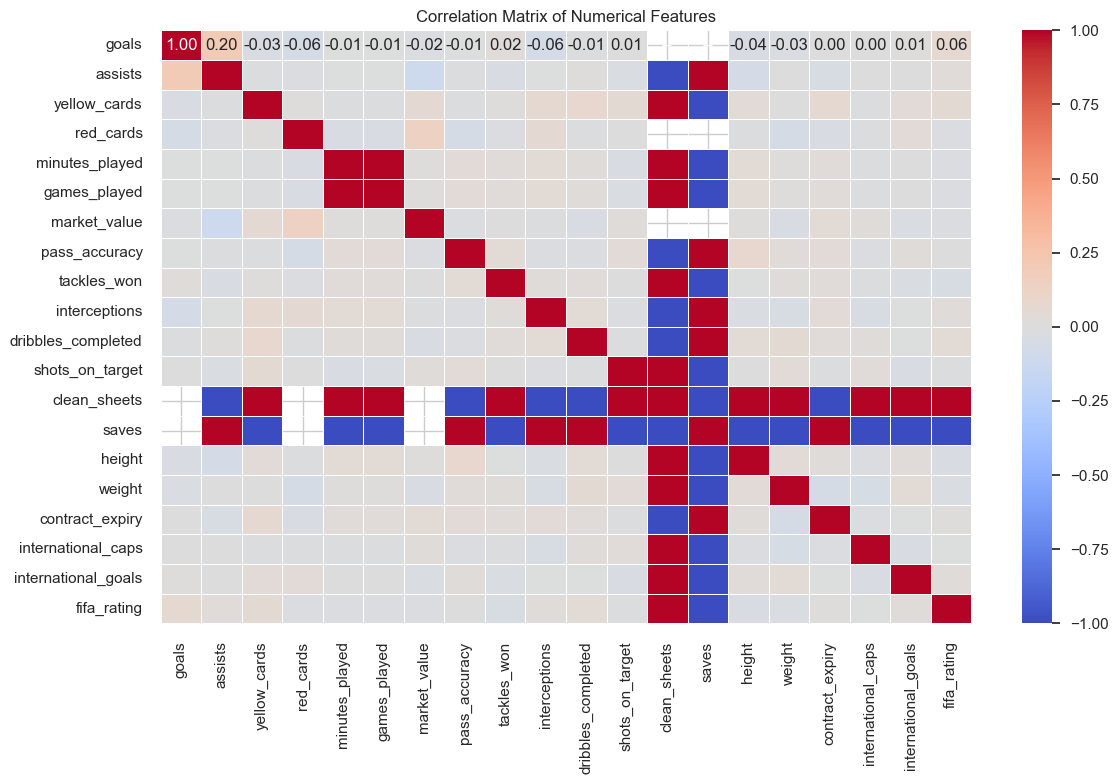

In [94]:
# Select only numeric columns
numeric_cols = merged_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()
